# 집값 예측 (Linear Regression)
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import myutils as my

## 데이터 준비

In [2]:
from sklearn.datasets import fetch_california_housing

#fetch가 들어있는 함수 -> 사이킷런에 있는 게 아니라 인터넷에 가서 파일을 다운로드 한 후 우리에게 넘겨주는 거

housing = fetch_california_housing()
type(housing)

sklearn.utils._bunch.Bunch

In [3]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [4]:
# data, target, feature-name

df= pd.DataFrame(housing.data, columns = housing.feature_names)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [5]:
df['target'] = housing.target

In [6]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [7]:
df.shape

(20640, 9)

In [10]:
df.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64

In [12]:
df.duplicated().sum()

0

In [15]:
X = df.iloc[:, :3]
y = df.iloc[:, -1]

In [16]:
X.head()

,MedInc,HouseAge,AveRooms
0,8.3252,41.0,6.984127
1,8.3014,21.0,6.238137
2,7.2574,52.0,8.288136
3,5.6431,52.0,5.817352
4,3.8462,52.0,6.281853


In [17]:
#스케일링 안하고 먼저 해보기

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 2022)

print(X_train.shape, X_test.shape)

(16512, 3) (4128, 3)


In [20]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train) #2차원 이상이 돼야 

LinearRegression()

In [33]:
#mse, rmse(X_test)까지 조사
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_pred = lr.predict(X_test)

#에러의 제곱의 평균
# MSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

mse, rmse

C:\Users\026\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


(4.719917088261623, 2.1725370165457765)

In [31]:
#스케일링 한 후 학습, mse, rmse(X_Test)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# scaler.fit(X_train)

# X_train = scaler.transform(X_train)
X_train = scaler.fit_transform(X_train) #numpy array상태라서 head()안됨
X_test = scaler.transform(X_test)

<AxesSubplot: xlabel='target'>

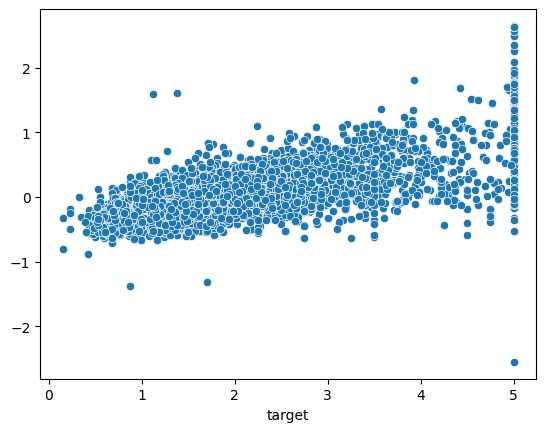

In [26]:
# 시각화
sns.scatterplot(x=y_test, y=y_pred)

In [28]:
from sklearn.model_selection import cross_val_score

mse = cross_val_score(lr, X_test, y_test,
                scoring='neg_mean_squared_error',
                cv=3)
mse


array([-0.63879692, -0.6664322 , -0.66737045])

In [29]:
np.mean(np.sqrt(-mse))

0.8108427192491202

In [32]:
### 결정 트리 
#스케일링 완료된 상태에서 
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

In [34]:

y_pred = dtr.predict(X_test)

#에러의 제곱의 평균
# MSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

mse, rmse

(1.1152175144679506, 1.0560385951602103)

In [36]:
### RandomForest

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [38]:
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

mse, rmse

(0.601382742672717, 0.77548871215042)

In [39]:
## svm

from sklearn.svm import SVR

svr = SVR()
svr.fit(X_train, y_train)

SVR()

In [40]:
y_pred = svr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

mse, rmse

(0.5432598441207688, 0.7370616284414545)

In [ ]:
## 규제
sklearn.Linear_model.Lasso
sklearn.Linear_model.Ridge